# This notebook demonstrates Rikai's visualization toolsets

In [1]:
from rikai.types import Image, Box2d, Mask
from rikai.io import open_uri
from pycocotools.coco import COCO
from tempfile import NamedTemporaryFile
from pathlib import Path

In [2]:
ANNOTATION_FILE = "s3://eto-public/coco/annotations/instances_val2017.json"
TMP_ANNO_FILE = Path("/tmp/coco.json")
if not TMP_ANNO_FILE.exists():
    with TMP_ANNO_FILE.open("w") as anno_file, open_uri(ANNOTATION_FILE) as cloud_anno:
        anno_file.write(cloud_anno.read().decode("utf-8"))
        anno_file.flush()

coco = COCO(TMP_ANNO_FILE)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


In [3]:
image_metadata = next(iter(coco.imgs.values()))
image_metadata


{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [4]:
img = Image(image_metadata["coco_url"])
img

Image(uri=http://images.cocodataset.org/val2017/000000397133.jpg)

In [5]:
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_metadata["id"]))
#annotations

In [6]:
boxes = [Box2d.from_top_left(*ann["bbox"]) for ann in annotations]
height, width = image_metadata["height"], image_metadata["width"]
segments = [Mask.from_polygon(ann["segmentation"], height=height, width=width) 
            if ann["iscrowd"] == 0 
            else Mask.from_coco_rle(ann["segmentation"]["counts"], height=height, width=width) 
            for ann in annotations]

In [7]:
boxes

[Box2d(xmin=217.62, ymin=240.54, xmax=256.61, ymax=298.28999999999996),
 Box2d(xmin=1.0, ymin=240.24, xmax=347.63, ymax=427.0),
 Box2d(xmin=388.66, ymin=69.92, xmax=498.07000000000005, ymax=347.54),
 Box2d(xmin=135.57, ymin=249.43, xmax=157.89, ymax=278.22),
 Box2d(xmin=31.28, ymin=344.0, xmax=99.4, ymax=384.83),
 Box2d(xmin=59.63, ymin=287.36, xmax=135.7, ymax=328.66),
 Box2d(xmin=1.36, ymin=164.33, xmax=193.92000000000002, ymax=262.70000000000005),
 Box2d(xmin=0.0, ymin=262.81, xmax=62.16, ymax=299.58),
 Box2d(xmin=119.4, ymin=272.51, xmax=144.22, ymax=306.76),
 Box2d(xmin=141.47, ymin=267.91, xmax=173.66, ymax=303.77000000000004),
 Box2d(xmin=155.97, ymin=168.95, xmax=182.0, ymax=186.07999999999998),
 Box2d(xmin=157.2, ymin=114.15, xmax=175.06, ymax=129.97),
 Box2d(xmin=98.75, ymin=304.78, xmax=109.53, ymax=310.34999999999997),
 Box2d(xmin=166.03, ymin=256.36, xmax=174.85, ymax=274.94),
 Box2d(xmin=86.41, ymin=293.97, xmax=110.37, ymax=305.15000000000003),
 Box2d(xmin=70.14, ymin=29

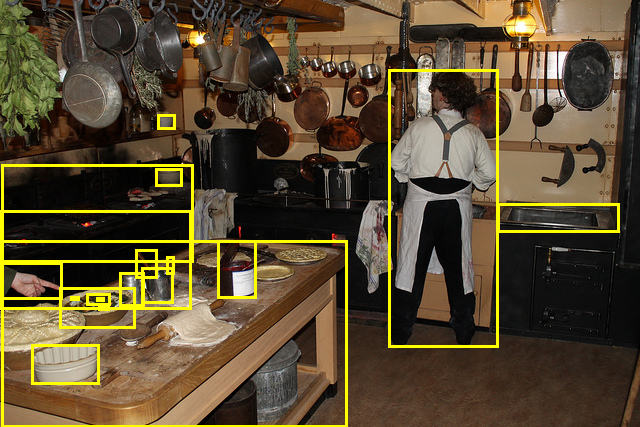

In [8]:
from functools import reduce

from rikai.viz import Style

box_style = Style(color="yellow", width=3)

reduce(lambda a, b: a & box_style(b), [img] + boxes)
